In [27]:
# importing importanrt libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# importing data
coffee = pd.read_csv("https://raw.githubusercontent.com/Tirth678/Data-Analysis-Projects/refs/heads/main/Coffee%20Sales/Data/index.csv")

In [5]:
# analysing data
coffee.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
coffee.index

RangeIndex(start=0, stop=1133, step=1)

In [8]:
coffee.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [11]:
coffee.shape

(1133, 6)

In [9]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


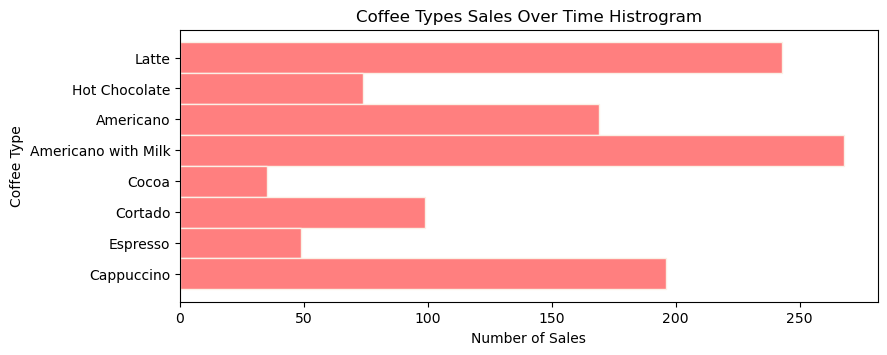

In [72]:
# visualization of data
plt.figure(figsize=(9,4))
plt.subplots_adjust(bottom=0.2)

sns.histplot(data=coffee, y='coffee_name', alpha=0.5, color='red', edgecolor='linen')
plt.title('Coffee Types Sales Over Quantity Histrogram')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Type')

plt.show()

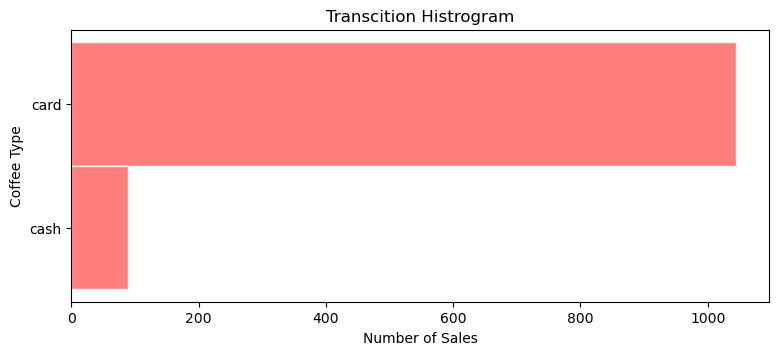

In [71]:
# visualization of data
plt.figure(figsize=(9,4))
plt.subplots_adjust(bottom=0.2)

sns.histplot(data=coffee,y='cash_type', alpha=0.5, color='red', edgecolor='linen', bins=8)
plt.title('Transcition Histrogram')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Type')

plt.show()


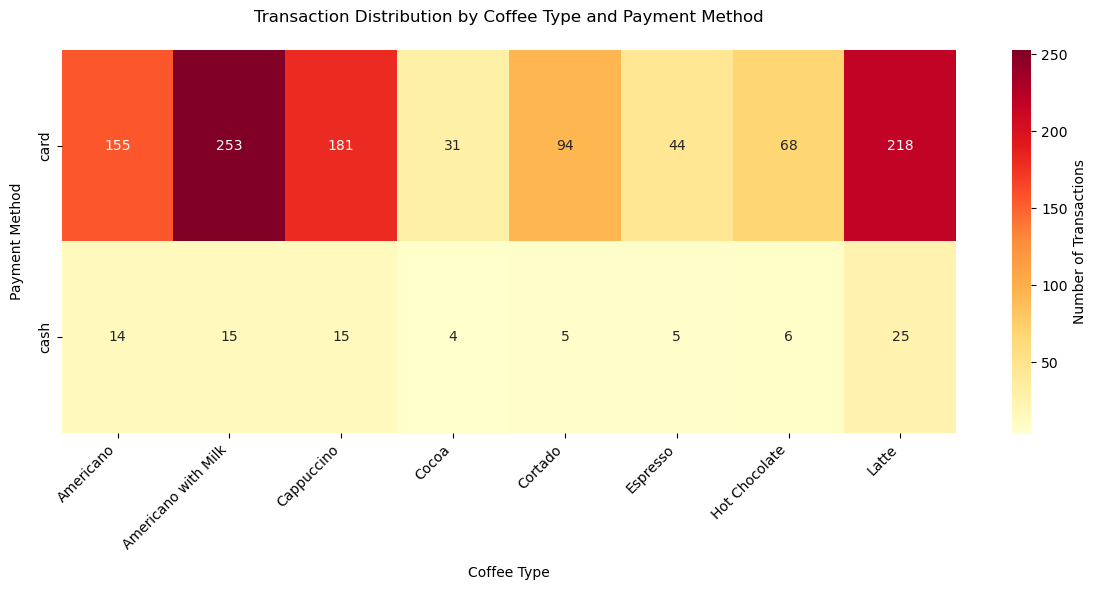

In [89]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom=0.2)


sns.heatmap(data=pd.crosstab(coffee['cash_type'], coffee['coffee_name']),
            cmap='YlOrRd',
            annot=True,
            fmt='d',
            cbar_kws={'label': 'Number of Transactions'})

plt.title('Transaction Distribution by Coffee Type and Payment Method', pad=20)
plt.xlabel('Coffee Type', labelpad=10)
plt.ylabel('Payment Method', labelpad=10)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_3441/724803353.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_spend.index, y=avg_spend.values, palette='Set2')


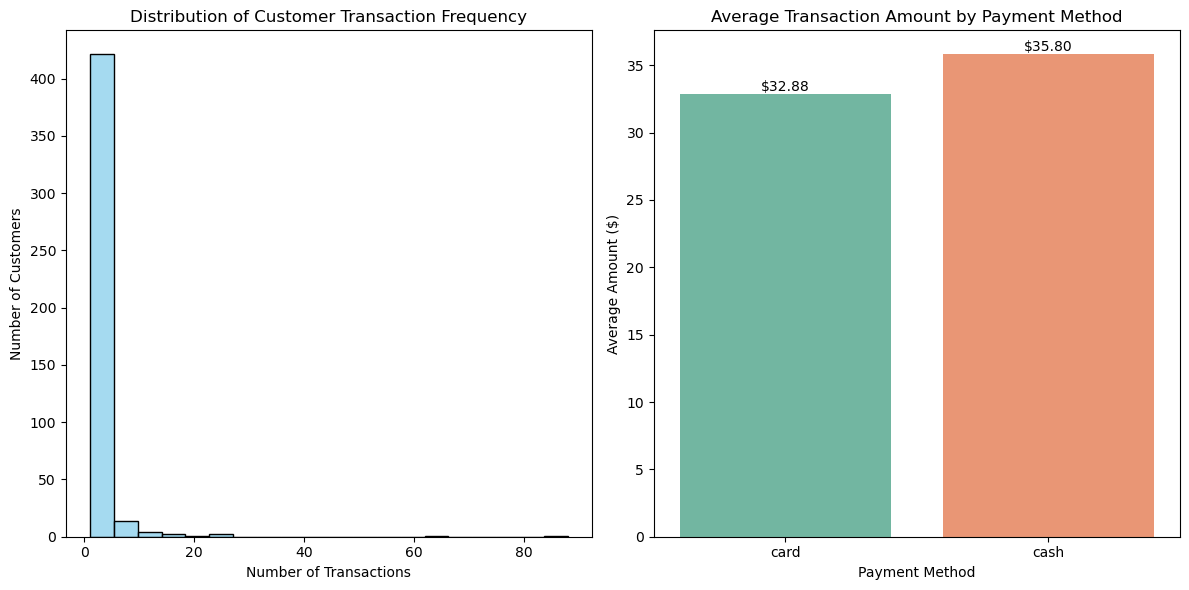


Customer Loyalty Statistics:
Total unique customers: 446
Average transactions per customer: 2.34
Most frequent customer transactions: 88

Spending Statistics:
Overall average transaction: $33.11
Average card transaction: $32.88
Average cash transaction: $35.80


In [90]:
# Customer Behavior Analysis


customer_freq = coffee[coffee['cash_type'] == 'card']['card'].value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)


sns.histplot(data=customer_freq, bins=20, color='skyblue')
plt.title('Distribution of Customer Transaction Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')


plt.subplot(1,2,2)
avg_spend = coffee.groupby('cash_type')['money'].mean()
sns.barplot(x=avg_spend.index, y=avg_spend.values, palette='Set2')
plt.title('Average Transaction Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Amount ($)')


for i, v in enumerate(avg_spend.values):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\nCustomer Loyalty Statistics:")
print(f"Total unique customers: {len(customer_freq)}")
print(f"Average transactions per customer: {customer_freq.mean():.2f}")
print(f"Most frequent customer transactions: {customer_freq.max()}")
print("\nSpending Statistics:")
print(f"Overall average transaction: ${coffee['money'].mean():.2f}")
for payment_type in avg_spend.index:
    print(f"Average {payment_type} transaction: ${avg_spend[payment_type]:.2f}")


/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_3441/356858920.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_revenue.index,


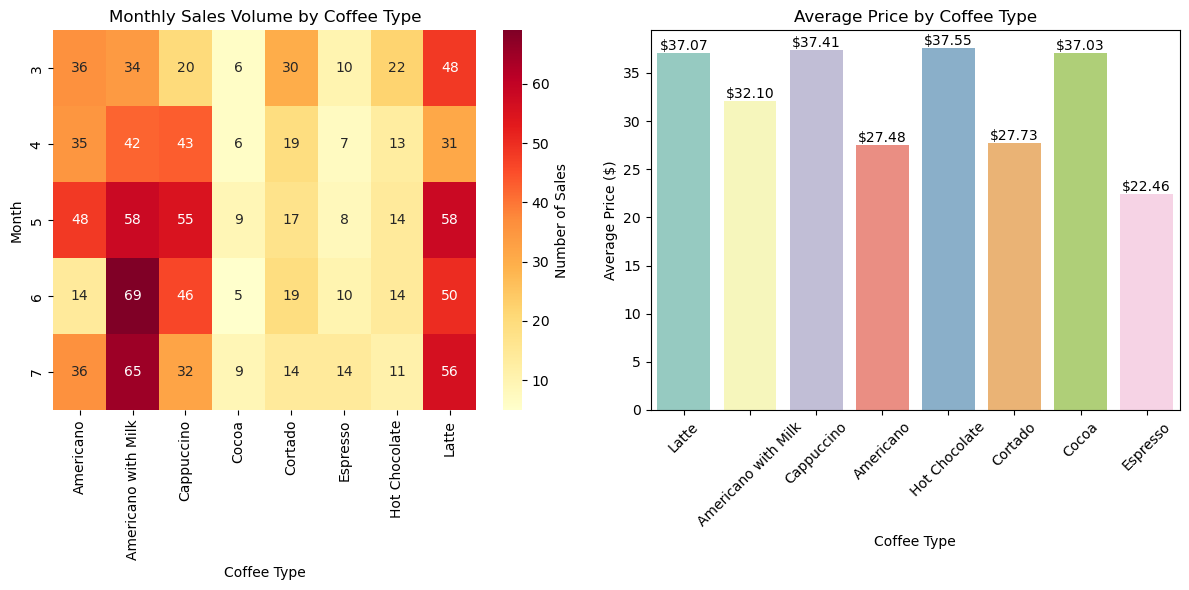


Coffee Type Statistics:

Top 5 Coffee Types by Total Revenue:
coffee_name
Latte                  $9,009.14
Americano with Milk    $8,601.94
Cappuccino             $7,333.14
Americano              $4,644.54
Hot Chocolate          $2,778.48
Name: sum, dtype: object

Top 5 Coffee Types by Sales Volume:
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Name: count, dtype: int64

Average Price Range:
Lowest: $22.46 (Espresso)
Highest: $37.55 (Hot Chocolate)


In [92]:
# Coffee Type Analysis


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)


coffee['datetime'] = pd.to_datetime(coffee['datetime'])


coffee['month'] = coffee['datetime'].dt.month


monthly_coffee_sales = coffee.pivot_table(
    index='month',
    columns='coffee_name',
    values='money',
    aggfunc='count'
)


sns.heatmap(monthly_coffee_sales,
            cmap='YlOrRd',
            annot=True,
            fmt='g',
            cbar_kws={'label': 'Number of Sales'})
plt.title('Monthly Sales Volume by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Month')


plt.subplot(1,2,2)
coffee_revenue = coffee.groupby('coffee_name')['money'].agg(['sum', 'count', 'mean'])
coffee_revenue = coffee_revenue.sort_values('sum', ascending=False)


sns.barplot(x=coffee_revenue.index,
           y=coffee_revenue['mean'],
           palette='Set3')
plt.title('Average Price by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)


for i, v in enumerate(coffee_revenue['mean']):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\nCoffee Type Statistics:")
print("\nTop 5 Coffee Types by Total Revenue:")
print(coffee_revenue['sum'].nlargest(5).apply(lambda x: f"${x:,.2f}"))

print("\nTop 5 Coffee Types by Sales Volume:")
print(coffee_revenue['count'].nlargest(5))

print("\nAverage Price Range:")
print(f"Lowest: ${coffee_revenue['mean'].min():.2f} ({coffee_revenue['mean'].idxmin()})")
print(f"Highest: ${coffee_revenue['mean'].max():.2f} ({coffee_revenue['mean'].idxmax()})")


/var/folders/s3/cvr5v5fn2lj0g39xwwzgpx_m0000gn/T/ipykernel_3441/976436780.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_weekend', y='total_sales', data=sales_comparison, palette='Set2')


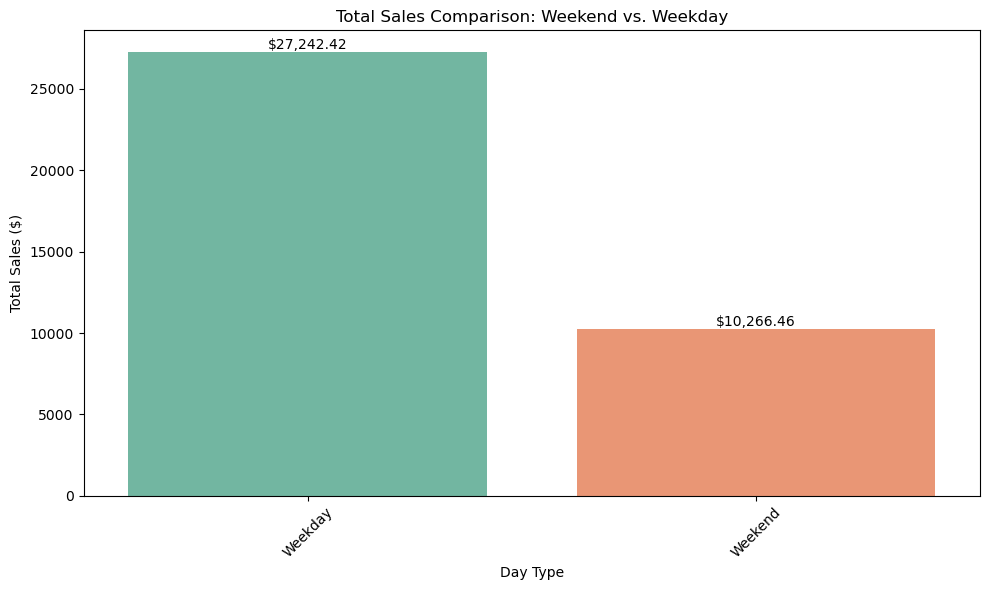


Sales Comparison between Weekends and Weekdays:
  is_weekend  total_sales  total_quantity
0    Weekday     27242.42             828
1    Weekend     10266.46             305


In [97]:

coffee['date'] = pd.to_datetime(coffee['date'])


coffee['day_of_week'] = coffee['date'].dt.day_name()


weekend_days = ['Saturday', 'Sunday']
coffee['is_weekend'] = coffee['day_of_week'].isin(weekend_days)


sales_comparison = coffee.groupby('is_weekend').agg(total_sales=('money', 'sum'), total_quantity=('coffee_name', 'count')).reset_index()


sales_comparison['is_weekend'] = sales_comparison['is_weekend'].map({True: 'Weekend', False: 'Weekday'})


plt.figure(figsize=(10, 6))
sns.barplot(x='is_weekend', y='total_sales', data=sales_comparison, palette='Set2')
plt.title('Total Sales Comparison: Weekend vs. Weekday')
plt.xlabel('Day Type')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)


for i, v in enumerate(sales_comparison['total_sales']):
    plt.text(i, v, f'${v:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


print("\nSales Comparison between Weekends and Weekdays:")
print(sales_comparison)


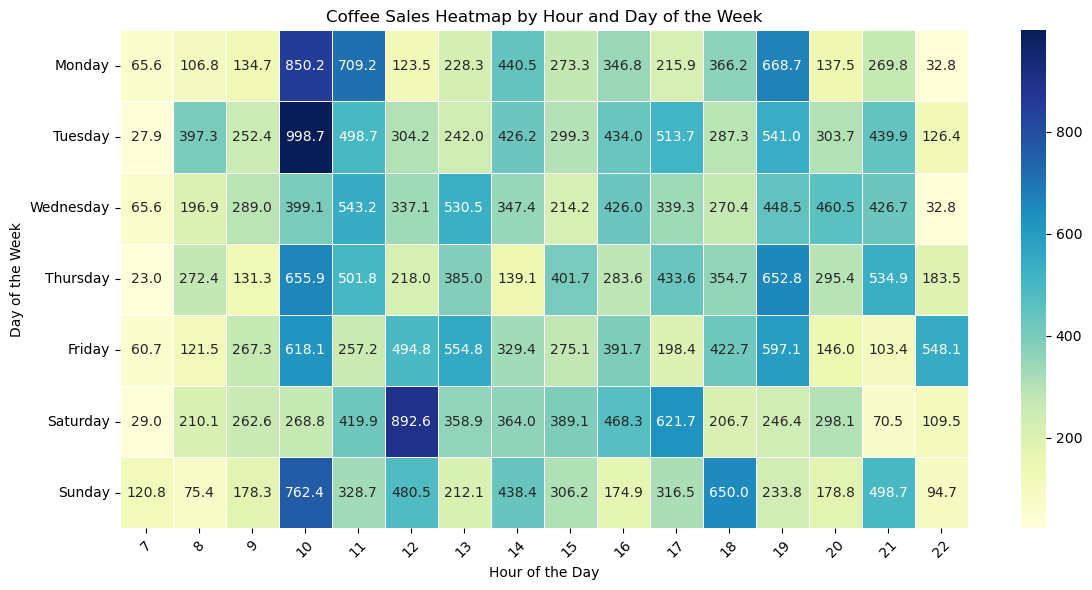

In [98]:

coffee['hour'] = coffee['datetime'].dt.hour

# Create a pivot table for heatmap data
heatmap_data = coffee.pivot_table(index='day_of_week', columns='hour', values='money', aggfunc='sum', fill_value=0)


ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)


plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Coffee Sales Heatmap by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
